In [2]:
import pandas as pd

In [3]:
# Read training data from json into a dataframe
train_data_df = pd.read_json('train.json')

In [4]:
train_data_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
import matplotlib.pyplot as plt

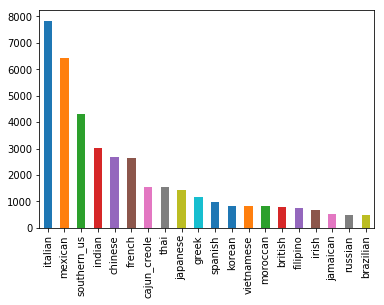

In [6]:
train_data_df['cuisine'].value_counts().plot(kind='bar')

In [7]:
from collections import Counter

In [8]:
# Count the number of recipes in which a unique ingredient is appearing in each cuisine
count_ingredients_cuisine = {}
for cuisine in train_data_df['cuisine'].unique():
    count_ingredients_cuisine[cuisine] = Counter()
    cuisine_indices = (train_data_df['cuisine'] == cuisine)
    for ingredients in train_data_df[cuisine_indices]['ingredients']:
        count_ingredients_cuisine[cuisine].update(ingredients)

In [9]:
# The 15 most common ingredients in indian cuisine
count_ingredients_cuisine['indian'].most_common(15)

[('salt', 1934),
 ('onions', 1195),
 ('garam masala', 862),
 ('water', 820),
 ('ground turmeric', 728),
 ('garlic', 726),
 ('cumin seed', 697),
 ('ground cumin', 683),
 ('vegetable oil', 593),
 ('oil', 546),
 ('ginger', 526),
 ('tomatoes', 521),
 ('tumeric', 492),
 ('chili powder', 485),
 ('green chilies', 484)]

## Preprocessing

In [10]:
# Create a column in the dataframe which combines the ingredients to a string
train_data_df['string_ingredients'] = train_data_df['ingredients'].map(';'.join)
train_data_df.head()

,cuisine,id,ingredients,string_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [ ]:
# Separate train data
train_data_list = [ingredients for ingredients in list(train_data_df['ingredients'])]
train_data_list # A 2D list

In [ ]:
# Separate train labels
train_label_list = [cuisine for cuisine in list(train_data_df['cuisine'])]
train_label_list

In [ ]:
# Replace blank spaces with underscores
def remove_white_space(list):
    string_of_words = ''
    for sublist in list:
        string_of_words += ' '.join(string.replace(' ', '_') for string in sublist)
    return string_of_words.split(' ')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(token_pattern='[a-zA-Z]+_*[a-zA-Z]+')
train_data_vectorized = vectorizer.fit_transform(list_of_ingredients)
print(train_data_vectorized)

In [ ]:
vectorizer.vocabulary_

In [ ]:
list_of_ingredients = remove_white_space(train_data_list)
len(list_of_ingredients)
list_of_ingredients